In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
import scipy

In [3]:
# sample meta-data
#this is the path file for desktop
#sample_info = pd.read_csv('C:/Users/lorte/Documents/data/IPTS_27405_reduced/IPTS_27405_Sample_Info.csv')
#this is path file for laptop
sample_info = pd.read_csv('C:/Users/lorte/Documents/data/sans/IPTS_27405_reduced/IPTS_27405_Sample_Info.csv')
path = os.getcwd()
figurepath = path + '/figures'

# helpful meta-data dictionaries
names = dict(zip(sample_info['Sample'], sample_info['Name']))
matrix = dict(zip(sample_info['Sample'], sample_info['Matrix Polymer']))
solvent_names = dict(zip(sample_info['Sample'], sample_info['Solvent']))

# target concentrations of polymer
target_CP = dict(zip(sample_info['Sample'], sample_info['Target CP Concentration']))
target_matrix = dict(zip(sample_info['Sample'], sample_info['Target Matrix Concentration']))

In [5]:
#read in the data
data_path = 'C:/Users/lorte/Documents/data/sans/IPTS_27405_reduced'
data_dir = data_path + '/'
files = os.listdir(data_dir)
sans_data = {}
for file in files:
    if 'merged' in file:
        key = int(file.split('_')[0][1:])
        sans_data[key] = pd.read_csv(data_dir + file, header = 2, delimiter = "\t", names = ['Q', 'I', 'DI', 'DQ'], nrows = 115)

#cutting the data 
for sample in sans_data.keys():
    sans_data[sample] = sans_data[sample][sans_data[sample].I > 0]
    sans_data[sample] = sans_data[sample][sans_data[sample].Q > 0.003]

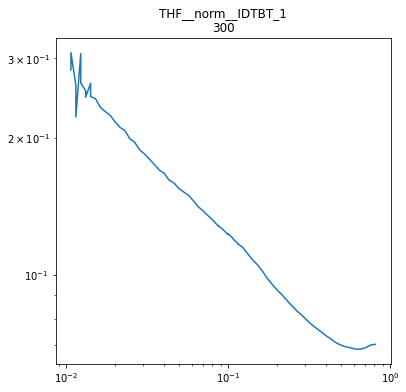

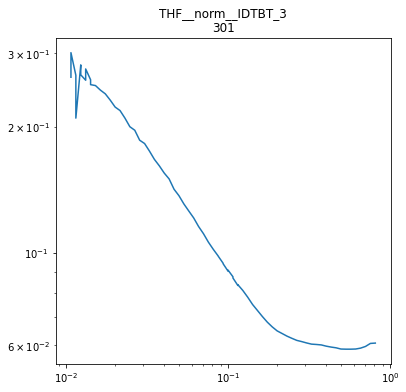

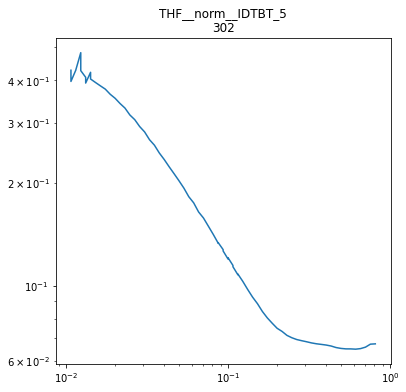

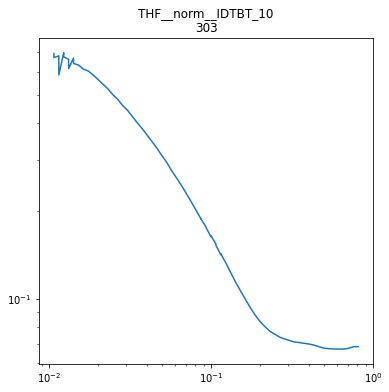

In [6]:
#plotting and cutting some data to determine background
sans_data_cut = {}
for sample in sans_data.keys():
    if solvent_names[sample] == 'Tetrahydrofuran D8':
        sans_data_cut[sample] = sans_data[sample][sans_data[sample].Q > 0.01]
        plt.figure(figsize = (6,6))
        plt.plot(sans_data_cut[sample].Q, sans_data_cut[sample].I)
        plt.title(names[sample]+"\n" +str(sample))
        plt.xscale('log')
        plt.yscale('log')

<ipython-input-7-7f1d625e3e14>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sans_data_cut[sample]['I'] = sans_data_cut[sample]['I']-background
<ipython-input-7-7f1d625e3e14>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sans_data_cut[sample]['I'] = sans_data_cut[sample]['I']-background
<ipython-input-7-7f1d625e3e14>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

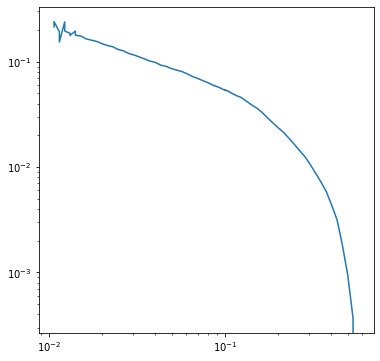

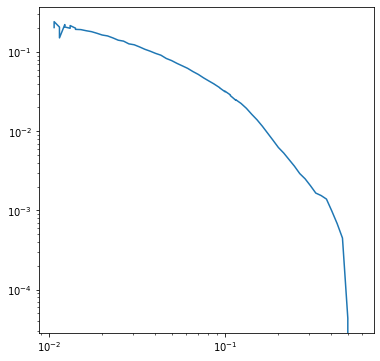

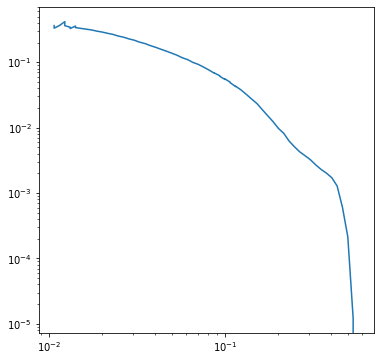

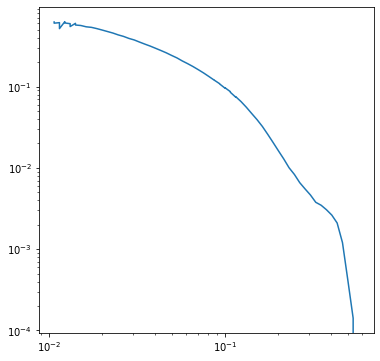

In [7]:
# sample by sample background subtraction
samplelist = [300,301,302,303]
for sample in samplelist:
    #background substraction and cut
    #background_loc_Q = 0.4977024
    #background_loc_Q = 0.2009233
    background_loc_Q = 0.5722368
    background_loc = sans_data_cut[sample][sans_data_cut[sample]['Q'] == background_loc_Q].index.values
    background = sans_data_cut[sample]['I'][background_loc].values[0]

    sans_data_cut[sample]['I'] = sans_data_cut[sample]['I']-background
    sans_data_cut[sample] = sans_data_cut[sample][sans_data_cut[sample].Q <= background_loc_Q]

    plt.figure(figsize = (6,6))
    plt.plot(sans_data_cut[sample].Q, sans_data_cut[sample].I)
    plt.xscale('log')
    plt.yscale('log')

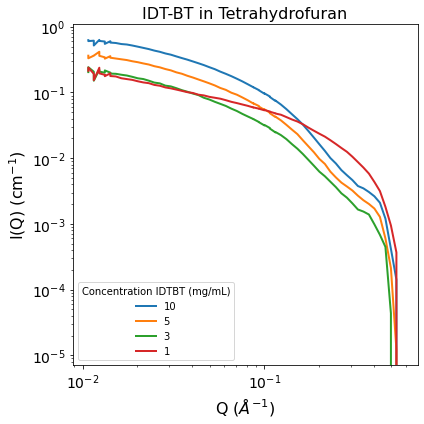

In [8]:
#plotting of multiple samples after background subtraction
plt.figure(figsize = (6,6))
title = "IDT-BT in Tetrahydrofuran"
legend_title = 'Concentration IDTBT (mg/mL)'
samplelist = [303,302,301,300]
for sample in samplelist:
        xval = sans_data_cut[sample]["Q"]
        yval = sans_data_cut[sample]["I"]
        plt.plot(xval,yval, label = target_CP[sample], lw =2)
        
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'Q ($\AA^{-1}$)', fontsize=16)
plt.ylabel(r'I(Q) (cm$^{-1}$)', fontsize=16)

legend = plt.legend(fontsize=10, title=legend_title)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.ylim(1e-03, 1e11)
#plt.xlim(0.00002, 0.3)

plt.title(title, fontsize=16)
    
plt.tight_layout()

plt.savefig(figurepath + "/"  + title, dpi=600)

In [13]:
#saving the data into readable format for sasview
# makes new data files of normalized data and dictionary of data keys and their filepaths
formatted_data_path = data_dir +'formatted'

if 'formatted' in os.listdir(data_path):
    print('formatted data path already exists')
else:
    os.mkdir(formatted_data_path)
    
for sample in samplelist:
    file = formatted_data_path + "/" + str(sample) + ".txt"
    a_file = open(file, "w")
    np.savetxt(a_file, sans_data_cut[sample])
    a_file.close()

formatted data path already exists
